In [1]:
!gdown "1wW-PTHoyVam7YtbDTy-pDGa5ghrajLnr"

Downloading...
From: https://drive.google.com/uc?id=1wW-PTHoyVam7YtbDTy-pDGa5ghrajLnr
To: /content/states_dataset_2.1.zip
100% 1.38G/1.38G [00:23<00:00, 57.5MB/s]


In [2]:
!unzip states_dataset_2.1.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/diced/0309.jpg    
  inflating: __MACOSX/train/diced/._0309.jpg  
  inflating: train/diced/6.Diced-Beef-1-a.jpg  
  inflating: train/diced/0296.jpg    
  inflating: __MACOSX/train/diced/._0296.jpg  
  inflating: train/diced/31.Beef-Diced-1-e1463912013261.jpg  
  inflating: __MACOSX/train/diced/._31.Beef-Diced-1-e1463912013261.jpg  
  inflating: train/diced/0282.jpg    
  inflating: __MACOSX/train/diced/._0282.jpg  
  inflating: train/diced/0255.jpg    
  inflating: __MACOSX/train/diced/._0255.jpg  
  inflating: train/diced/0241.jpg    
  inflating: __MACOSX/train/diced/._0241.jpg  
  inflating: train/diced/19.diced-beef.png  
  inflating: train/diced/0269.jpg    
  inflating: __MACOSX/train/diced/._0269.jpg  
  inflating: train/diced/0094.jpg    
  inflating: __MACOSX/train/diced/._0094.jpg  
  inflating: train/diced/0080.jpg    
  inflating: __MACOSX/train/diced/._0080.jpg  
  inflating: train/diced/97.beefStewCubes

In [3]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam


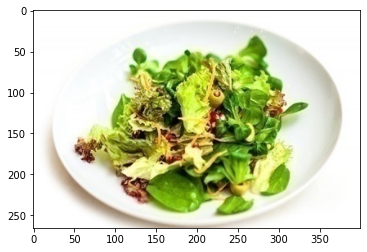

In [4]:
img = cv2.imread('/content/train/mixed/0001.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [5]:
train_path = "/content/train"
test_path = "/content/valid"
labels = [f for f in os.listdir(train_path) if not f.startswith('.')]
labels

['sliced',
 'peeled',
 'jullienne',
 'grated',
 'creamy_paste',
 'diced',
 'other',
 'whole',
 'juiced',
 'mixed',
 'floured']

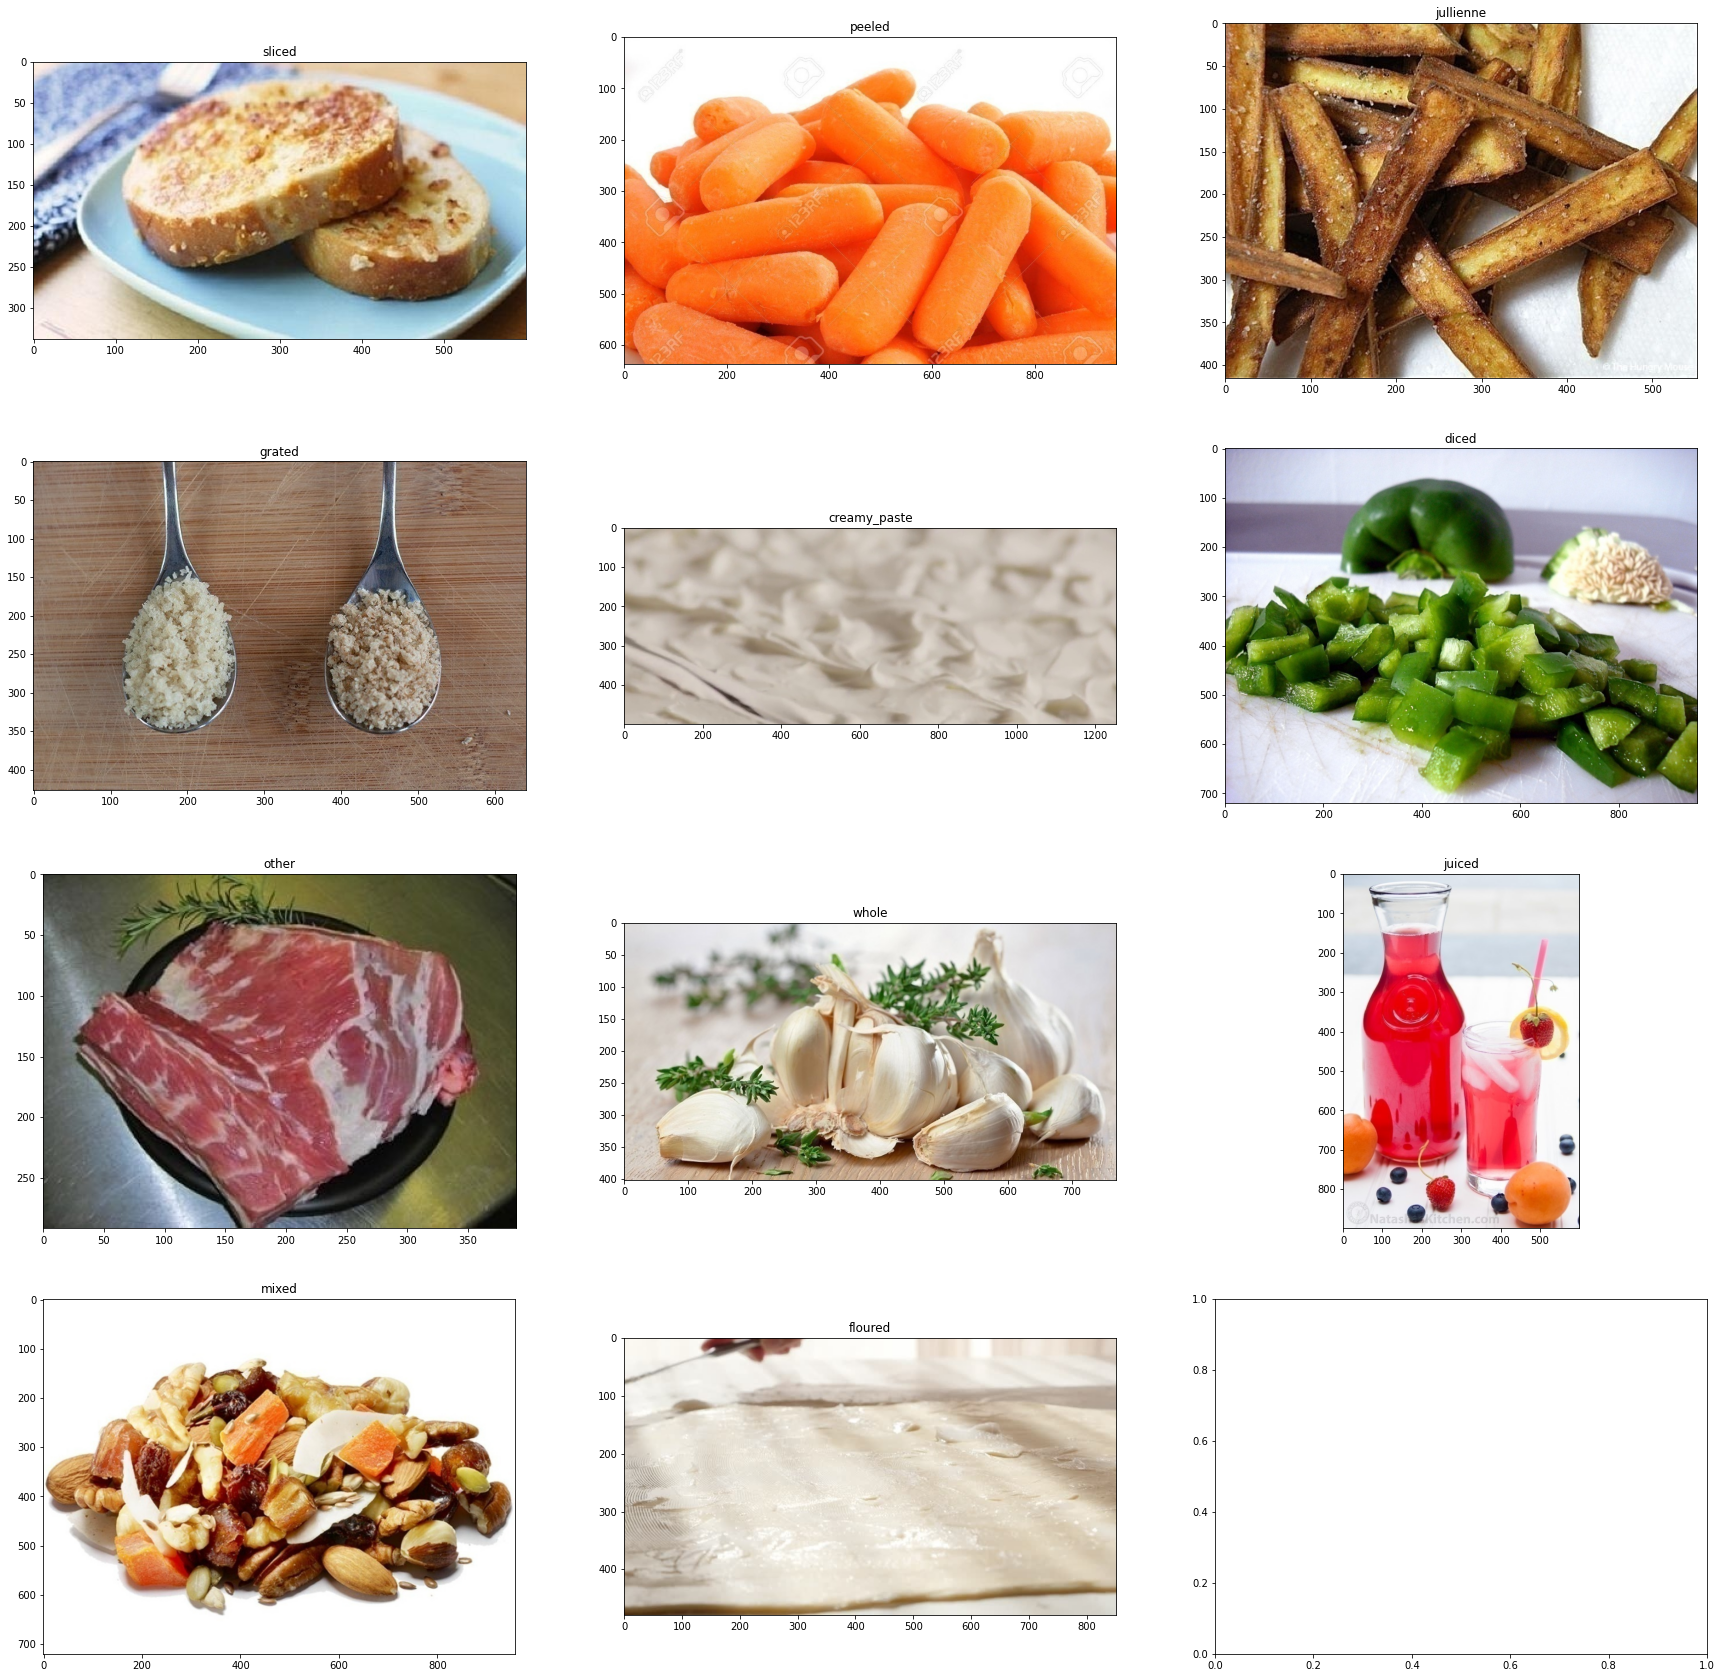

In [6]:
# delare figure and ax with 4 rows and 3 clomns with 30*30 size
fig, ax = plt.subplots(4,3,figsize=(30,30))
for i in range(12):
  try:
    inner_images = os.path.join(train_path,labels[i])
  except:
    break
  # gets the first image of the file to display it 
  img = os.listdir(inner_images)[0]
  full_path = os.path.join(inner_images,img)
  plt.subplot(4,3,i+1)
  img = cv2.imread(full_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.title(labels[i])

In [8]:
label_map = {k:v for v,k in enumerate(labels)}
label_map

{'sliced': 0,
 'peeled': 1,
 'jullienne': 2,
 'grated': 3,
 'creamy_paste': 4,
 'diced': 5,
 'other': 6,
 'whole': 7,
 'juiced': 8,
 'mixed': 9,
 'floured': 10}

In [9]:
def get_data(path,labels):
  data_dict = {"images":[], "labels":[]}
  for label in labels:
    inner_path = os.path.join(path,label)
    for item in os.listdir(inner_path):
      data_dict['images'].append(os.path.join(inner_path,item))
      data_dict['labels'].append(label_map[label])
  return pd.DataFrame(data_dict).sample(frac=1)

In [10]:
train_data = get_data(train_path,labels)
test_data = get_data(test_path,labels)
# display first 5 rows
train_data.head()

,images,labels
5364,/content/train/other/0240.jpg,6
7666,/content/train/mixed/0192.jpg,9
2210,/content/train/jullienne/0230.jpg,2
1211,/content/train/peeled/0001.jpg,1
6000,/content/train/whole/0597.jpg,7


In [11]:
train_data['labels'].value_counts()

0     1122
7      932
5      898
8      881
6      873
4      757
3      696
9      677
2      607
10     582
1      558
Name: labels, dtype: int64

In [12]:
IMG_SIZE = 300
train_images = []
for path in tqdm(train_data['images']):
  img = cv2.imread(path)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
  train_images.append(img)

100%|██████████| 8583/8583 [01:05<00:00, 130.23it/s]


In [13]:
test_images = []
for path in tqdm(test_data['images']):
  img = cv2.imread(path)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
  test_images.append(img)

100%|██████████| 1912/1912 [00:16<00:00, 118.30it/s]


In [14]:
# convert list to numpy array
x_train=np.asarray(train_images)
y_train = np.asarray(train_data['labels'])

In [15]:
x_test=np.asarray(test_images)
y_test = np.asarray(test_data['labels'])

In [16]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
#display the shape of training and testing data
print(f"X train Shape is {x_train.shape}")
print(f"Y train Shape is {y_train.shape}")
print(f"X Test Shape is {x_test.shape}")
print(f"Y test Shape is {y_test.shape}")

X train Shape is (8583, 300, 300, 3)
Y train Shape is (8583, 11)
X Test Shape is (1912, 300, 300, 3)
Y test Shape is (1912, 11)


In [18]:
del train_images,test_images

MODEL CNN

In [19]:
# declare our model with sequential connection
model = Sequential([
    Conv2D(filters=32,kernel_size= (4,4),padding ='Same',
           activation = 'relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), padding ='Same',activation='relu'),
    MaxPooling2D(2,2), 
    Conv2D(128, (3,3), padding ='Same', activation='relu'),  
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), padding ='Same', activation='relu'), 
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), padding ='Same', activation='relu'), 
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), padding ='Same', activation='relu'), 
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), padding ='Same', activation='relu'), 
    MaxPooling2D(2,2),
    Dropout(0.5),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(len(labels), activation='softmax')      
    ])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 128)      0

In [22]:
optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)

model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

In [23]:
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs = 20)

Epoch 1/20
269/269 [==============================] - 63s 181ms/step - loss: 2.4426 - accuracy: 0.1687 - val_loss: 2.1818 - val_accuracy: 0.2029
Epoch 2/20
269/269 [==============================] - 46s 171ms/step - loss: 2.1521 - accuracy: 0.2308 - val_loss: 2.1179 - val_accuracy: 0.2207
Epoch 3/20
269/269 [==============================] - 47s 174ms/step - loss: 2.0867 - accuracy: 0.2527 - val_loss: 2.0555 - val_accuracy: 0.2495
Epoch 4/20
269/269 [==============================] - 46s 171ms/step - loss: 2.0045 - accuracy: 0.2861 - val_loss: 2.0244 - val_accuracy: 0.2756
Epoch 5/20
269/269 [==============================] - 46s 169ms/step - loss: 1.9323 - accuracy: 0.3126 - val_loss: 1.9815 - val_accuracy: 0.2903
Epoch 6/20
269/269 [==============================] - 46s 173ms/step - loss: 1.8753 - accuracy: 0.3334 - val_loss: 1.8904 - val_accuracy: 0.3149
Epoch 7/20
269/269 [==============================] - 46s 169ms/step - loss: 1.8054 - accuracy: 0.3634 - val_loss: 2.0376 - val_ac

In [24]:
def plot_graph(history,string):
    
    plt.plot(history.history[string],label='training '+string)
    plt.plot(history.history['val_'+string],label='validation '+string)
    plt.legend()
    plt.xlabel('epochs')
    plt.ylabel(string)
    plt.title(string+' vs epochs')
    plt.show

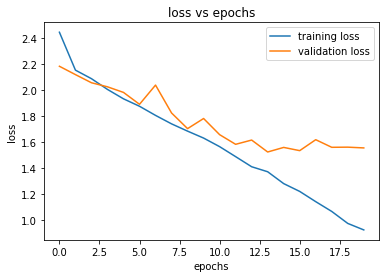

In [25]:
plot_graph(history,'loss')

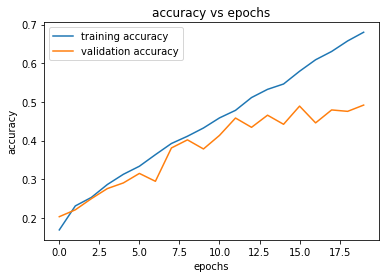

In [26]:
plot_graph(history,'accuracy')

In [27]:
print("Model Performance on test set")
result = model.evaluate(x_test,y_test)
print(dict(zip(model.metrics_names, result)))

Model Performance on test set
60/60 [==============================] - 2s 31ms/step - loss: 1.5562 - accuracy: 0.4916
{'loss': 1.556198000907898, 'accuracy': 0.49163180589675903}


In [28]:
def state_prediction(path,model):

  img = cv2.imread(path)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
  img = np.array(img).reshape(-1,IMG_SIZE,IMG_SIZE,3)
  prediction = model.predict(img)
  result = np.argmax(prediction)
  for k,v in label_map.items():
    if v == result:
      return k
state_prediction('/content/train/creamy_paste/0018.jpg',model)

1/1 [==============================] - 1s 587ms/step


'creamy_paste'

In [29]:
model.save('model.h5')

TESTING SCRIPT

In [2]:
from keras.models import load_model
import cv2
import numpy as np
import os
from tqdm import tqdm
import json
from google.colab import drive
drive.mount('/content/drive')
test_dir = '/content/drive/MyDrive/test/test/anonymous'

model = load_model('model.h5',compile=False)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

IMG_SIZE = 300

map_output = {0: 'sliced',
 1: 'peeled',
 2: 'jullienne',
 3: 'grated',
 4: 'creamy_paste',
 5: 'diced',
 6: 'other',
 7: 'whole',
 8: 'juiced',
 9: 'mixed',
 10: 'floured'}


def predict(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = np.array(img).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
    result = model.predict(img)
    return map_output[np.argmax(result)]


outputs = {}
for image in tqdm(os.listdir(test_dir)):
    full_path = os.path.join(test_dir,image)
    outputs[image] = predict(full_path)

with open("prediction.json", "w") as outfile:
    json.dump(outputs, outfile)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 8s 8s/step


  0%|          | 1/500 [00:08<1:09:58,  8.41s/it]

1/1 [==============================] - 0s 21ms/step


  0%|          | 2/500 [00:09<34:58,  4.21s/it]  

1/1 [==============================] - 0s 20ms/step


  1%|          | 3/500 [00:10<22:20,  2.70s/it]

1/1 [==============================] - 0s 27ms/step


  1%|          | 4/500 [00:11<15:39,  1.89s/it]

1/1 [==============================] - 0s 20ms/step


  1%|          | 5/500 [00:12<14:55,  1.81s/it]

1/1 [==============================] - 0s 120ms/step


  1%|          | 6/500 [00:14<13:12,  1.60s/it]

1/1 [==============================] - 0s 41ms/step


  1%|▏         | 7/500 [00:16<15:02,  1.83s/it]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 8/500 [00:17<12:53,  1.57s/it]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 10/500 [00:17<07:47,  1.05it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 11/500 [00:18<07:32,  1.08it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 13/500 [00:18<04:40,  1.74it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 15/500 [00:19<03:08,  2.57it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 17/500 [00:19<02:13,  3.62it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 19/500 [00:19<01:39,  4.84it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 21/500 [00:19<01:17,  6.16it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 23/500 [00:19<01:03,  7.56it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▌         | 25/500 [00:19<00:52,  9.00it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▌         | 27/500 [00:19<00:45, 10.38it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 29/500 [00:20<00:40, 11.53it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 31/500 [00:20<00:38, 12.30it/s]

1/1 [==============================] - 0s 19ms/step


  7%|▋         | 33/500 [00:20<00:35, 13.03it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 35/500 [00:20<00:35, 13.05it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 37/500 [00:20<00:34, 13.24it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 39/500 [00:20<00:34, 13.23it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 41/500 [00:20<00:33, 13.60it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 43/500 [00:21<00:32, 13.89it/s]

1/1 [==============================] - 0s 29ms/step


  9%|▉         | 45/500 [00:21<00:33, 13.74it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 47/500 [00:21<00:33, 13.45it/s]

1/1 [==============================] - 0s 27ms/step


 10%|▉         | 49/500 [00:21<00:33, 13.65it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 51/500 [00:21<00:32, 13.84it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 53/500 [00:21<00:33, 13.54it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 55/500 [00:21<00:32, 13.81it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█▏        | 57/500 [00:22<00:32, 13.59it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 59/500 [00:22<00:31, 13.84it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 61/500 [00:22<00:30, 14.54it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 63/500 [00:22<00:30, 14.30it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 65/500 [00:22<00:32, 13.54it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 67/500 [00:22<00:31, 13.89it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 69/500 [00:22<00:31, 13.82it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 71/500 [00:23<00:30, 13.90it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 73/500 [00:23<00:31, 13.63it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 75/500 [00:23<00:31, 13.54it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▌        | 77/500 [00:23<00:31, 13.51it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 79/500 [00:23<00:30, 13.60it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 81/500 [00:23<00:30, 13.58it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 83/500 [00:23<00:30, 13.49it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 85/500 [00:24<00:31, 13.38it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 87/500 [00:24<00:29, 14.03it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 89/500 [00:24<00:28, 14.20it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 91/500 [00:24<00:28, 14.60it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 93/500 [00:24<00:28, 14.23it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 95/500 [00:24<00:28, 14.43it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 97/500 [00:24<00:27, 14.52it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 99/500 [00:25<00:27, 14.73it/s]

1/1 [==============================] - 0s 20ms/step


 20%|██        | 101/500 [00:25<00:26, 14.88it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██        | 103/500 [00:25<00:27, 14.66it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 105/500 [00:25<00:27, 14.32it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 107/500 [00:25<00:28, 13.97it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 109/500 [00:25<00:27, 14.46it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 111/500 [00:25<00:26, 14.47it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 113/500 [00:26<00:26, 14.56it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 115/500 [00:26<00:26, 14.39it/s]

1/1 [==============================] - 0s 29ms/step


 23%|██▎       | 117/500 [00:26<00:27, 14.00it/s]

1/1 [==============================] - 0s 32ms/step


 24%|██▍       | 119/500 [00:26<00:31, 12.01it/s]

1/1 [==============================] - 0s 28ms/step


 24%|██▍       | 121/500 [00:26<00:33, 11.16it/s]

1/1 [==============================] - 0s 33ms/step


 25%|██▍       | 123/500 [00:26<00:34, 10.77it/s]

1/1 [==============================] - 0s 34ms/step


 25%|██▌       | 125/500 [00:27<00:37, 10.04it/s]

1/1 [==============================] - 0s 30ms/step


 25%|██▌       | 127/500 [00:27<00:37, 10.00it/s]

1/1 [==============================] - 0s 30ms/step


 26%|██▌       | 129/500 [00:27<00:37,  9.78it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██▌       | 130/500 [00:27<00:38,  9.68it/s]

1/1 [==============================] - 0s 28ms/step


 26%|██▌       | 131/500 [00:27<00:38,  9.49it/s]

1/1 [==============================] - 0s 34ms/step


 27%|██▋       | 133/500 [00:28<00:38,  9.53it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██▋       | 135/500 [00:28<00:38,  9.49it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██▋       | 136/500 [00:28<00:40,  9.09it/s]

1/1 [==============================] - 0s 34ms/step


 28%|██▊       | 138/500 [00:28<00:39,  9.09it/s]

1/1 [==============================] - 0s 53ms/step


 28%|██▊       | 139/500 [00:28<00:40,  8.98it/s]

1/1 [==============================] - 0s 37ms/step


 28%|██▊       | 140/500 [00:28<00:40,  8.81it/s]

1/1 [==============================] - 0s 38ms/step


 28%|██▊       | 142/500 [00:29<00:39,  8.99it/s]

1/1 [==============================] - 0s 29ms/step


 29%|██▉       | 144/500 [00:29<00:38,  9.19it/s]

1/1 [==============================] - 0s 30ms/step


 29%|██▉       | 145/500 [00:29<00:38,  9.19it/s]

1/1 [==============================] - 0s 35ms/step


 29%|██▉       | 146/500 [00:29<00:37,  9.34it/s]

1/1 [==============================] - 0s 29ms/step


 30%|██▉       | 148/500 [00:29<00:35,  9.81it/s]

1/1 [==============================] - 0s 29ms/step


 30%|██▉       | 149/500 [00:29<00:36,  9.52it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███       | 150/500 [00:29<00:36,  9.59it/s]

1/1 [==============================] - 0s 36ms/step


 30%|███       | 151/500 [00:30<00:36,  9.68it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███       | 152/500 [00:30<00:36,  9.59it/s]

1/1 [==============================] - 0s 38ms/step


 31%|███       | 153/500 [00:30<00:36,  9.41it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███       | 154/500 [00:30<00:37,  9.25it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███       | 156/500 [00:30<00:33, 10.24it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 158/500 [00:30<00:30, 11.24it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 160/500 [00:30<00:28, 12.06it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 162/500 [00:30<00:26, 12.83it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 164/500 [00:31<00:25, 12.96it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 166/500 [00:31<00:25, 13.06it/s]

1/1 [==============================] - 0s 19ms/step


 34%|███▎      | 168/500 [00:31<00:24, 13.32it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 170/500 [00:31<00:24, 13.41it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███▍      | 172/500 [00:31<00:25, 13.11it/s]

1/1 [==============================] - 0s 39ms/step


 35%|███▍      | 174/500 [00:31<00:26, 12.34it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 176/500 [00:32<00:28, 11.30it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 178/500 [00:32<00:26, 12.17it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▌      | 180/500 [00:32<00:25, 12.79it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▋      | 182/500 [00:32<00:24, 13.14it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 184/500 [00:32<00:22, 13.81it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 186/500 [00:32<00:22, 13.85it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 188/500 [00:32<00:22, 14.17it/s]

1/1 [==============================] - 0s 20ms/step


 38%|███▊      | 190/500 [00:33<00:22, 13.91it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 192/500 [00:33<00:22, 13.76it/s]

1/1 [==============================] - 0s 20ms/step


 39%|███▉      | 194/500 [00:33<00:21, 14.02it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 196/500 [00:33<00:21, 14.25it/s]

1/1 [==============================] - 0s 19ms/step


 40%|███▉      | 198/500 [00:33<00:21, 13.86it/s]

1/1 [==============================] - 0s 25ms/step


 40%|████      | 200/500 [00:33<00:21, 14.01it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 202/500 [00:33<00:21, 13.59it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████      | 204/500 [00:34<00:21, 13.49it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████      | 206/500 [00:34<00:21, 13.48it/s]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 208/500 [00:34<00:21, 13.62it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 210/500 [00:34<00:21, 13.63it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 212/500 [00:34<00:20, 13.81it/s]

1/1 [==============================] - 0s 20ms/step


 43%|████▎     | 214/500 [00:34<00:20, 14.17it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 216/500 [00:34<00:20, 13.92it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▎     | 218/500 [00:35<00:20, 13.79it/s]

1/1 [==============================] - 0s 20ms/step


 44%|████▍     | 220/500 [00:35<00:19, 14.23it/s]

1/1 [==============================] - 0s 20ms/step


 44%|████▍     | 222/500 [00:35<00:19, 14.05it/s]

1/1 [==============================] - 0s 29ms/step


 45%|████▍     | 224/500 [00:35<00:19, 14.01it/s]

1/1 [==============================] - 0s 20ms/step


 45%|████▌     | 226/500 [00:35<00:19, 13.81it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▌     | 228/500 [00:35<00:19, 13.85it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▌     | 230/500 [00:35<00:19, 13.91it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▋     | 232/500 [00:36<00:19, 13.63it/s]

1/1 [==============================] - 0s 20ms/step


 47%|████▋     | 234/500 [00:36<00:19, 13.47it/s]

1/1 [==============================] - 0s 19ms/step


 47%|████▋     | 236/500 [00:36<00:19, 13.35it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 238/500 [00:36<00:19, 13.23it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 240/500 [00:36<00:19, 13.14it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 242/500 [00:36<00:19, 13.50it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 244/500 [00:37<00:19, 13.33it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 246/500 [00:37<00:18, 13.52it/s]

1/1 [==============================] - 0s 28ms/step


 50%|████▉     | 248/500 [00:37<00:18, 13.40it/s]

1/1 [==============================] - 0s 19ms/step


 50%|█████     | 250/500 [00:37<00:18, 13.55it/s]

1/1 [==============================] - 0s 20ms/step


 50%|█████     | 252/500 [00:37<00:18, 13.74it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████     | 254/500 [00:37<00:18, 13.39it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████     | 256/500 [00:37<00:18, 13.03it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 258/500 [00:38<00:18, 12.96it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 260/500 [00:38<00:17, 13.39it/s]

1/1 [==============================] - 0s 30ms/step


 52%|█████▏    | 262/500 [00:38<00:18, 12.97it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 264/500 [00:38<00:18, 13.11it/s]

1/1 [==============================] - 0s 20ms/step


 53%|█████▎    | 266/500 [00:38<00:17, 13.44it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▎    | 268/500 [00:38<00:16, 13.92it/s]

1/1 [==============================] - 0s 28ms/step


 54%|█████▍    | 270/500 [00:38<00:17, 13.15it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▍    | 272/500 [00:39<00:17, 13.40it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▍    | 274/500 [00:39<00:17, 13.05it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 276/500 [00:39<00:17, 13.01it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 278/500 [00:39<00:16, 13.33it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 280/500 [00:39<00:16, 13.53it/s]

1/1 [==============================] - 0s 21ms/step


 56%|█████▋    | 282/500 [00:39<00:16, 12.94it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 284/500 [00:40<00:17, 12.68it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 286/500 [00:40<00:16, 13.08it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 288/500 [00:40<00:16, 12.90it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 290/500 [00:40<00:17, 12.27it/s]

1/1 [==============================] - 0s 34ms/step


 58%|█████▊    | 292/500 [00:40<00:18, 11.17it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████▉    | 294/500 [00:40<00:19, 10.56it/s]

1/1 [==============================] - 0s 30ms/step


 59%|█████▉    | 296/500 [00:41<00:20,  9.88it/s]

1/1 [==============================] - 0s 33ms/step


 60%|█████▉    | 298/500 [00:41<00:20,  9.71it/s]

1/1 [==============================] - 0s 32ms/step


 60%|█████▉    | 299/500 [00:41<00:21,  9.56it/s]

1/1 [==============================] - 0s 31ms/step


 60%|██████    | 301/500 [00:41<00:20,  9.71it/s]

1/1 [==============================] - 0s 34ms/step


 60%|██████    | 302/500 [00:41<00:20,  9.68it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████    | 304/500 [00:41<00:19,  9.97it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████    | 305/500 [00:42<00:20,  9.29it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████    | 306/500 [00:42<00:20,  9.34it/s]

1/1 [==============================] - 0s 30ms/step


 62%|██████▏   | 308/500 [00:42<00:19,  9.84it/s]

1/1 [==============================] - 0s 30ms/step


 62%|██████▏   | 309/500 [00:42<00:19,  9.64it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 311/500 [00:42<00:18, 10.29it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 313/500 [00:42<00:18, 10.20it/s]

1/1 [==============================] - 0s 46ms/step


 63%|██████▎   | 315/500 [00:43<00:18,  9.74it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 317/500 [00:43<00:18,  9.78it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 319/500 [00:43<00:18,  9.95it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▍   | 320/500 [00:43<00:18,  9.93it/s]

1/1 [==============================] - 0s 42ms/step


 64%|██████▍   | 322/500 [00:43<00:18,  9.74it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▍   | 324/500 [00:44<00:17, 10.01it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▌   | 326/500 [00:44<00:17,  9.88it/s]

1/1 [==============================] - 0s 21ms/step


 66%|██████▌   | 328/500 [00:44<00:16, 10.18it/s]

1/1 [==============================] - 0s 21ms/step


 66%|██████▌   | 330/500 [00:44<00:15, 10.91it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▋   | 332/500 [00:44<00:14, 11.41it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 334/500 [00:44<00:13, 12.39it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 336/500 [00:45<00:12, 13.07it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████▊   | 338/500 [00:45<00:12, 13.45it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 340/500 [00:45<00:11, 13.54it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 342/500 [00:45<00:12, 12.69it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▉   | 344/500 [00:45<00:15,  9.75it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▉   | 346/500 [00:46<00:17,  8.73it/s]

1/1 [==============================] - 0s 116ms/step


 69%|██████▉   | 347/500 [00:46<00:19,  7.66it/s]

1/1 [==============================] - 0s 38ms/step


 70%|██████▉   | 348/500 [00:46<00:21,  7.04it/s]

1/1 [==============================] - 0s 34ms/step


 70%|██████▉   | 349/500 [00:46<00:21,  7.17it/s]

1/1 [==============================] - 0s 40ms/step


 70%|███████   | 350/500 [00:46<00:20,  7.27it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████   | 351/500 [00:46<00:22,  6.61it/s]

1/1 [==============================] - 0s 42ms/step


 70%|███████   | 352/500 [00:47<00:23,  6.23it/s]

1/1 [==============================] - 0s 30ms/step


 71%|███████   | 353/500 [00:47<00:21,  6.78it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████   | 354/500 [00:47<00:22,  6.51it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████   | 355/500 [00:47<00:25,  5.72it/s]

1/1 [==============================] - 0s 44ms/step


 71%|███████   | 356/500 [00:47<00:23,  6.16it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████▏  | 357/500 [00:47<00:21,  6.60it/s]

1/1 [==============================] - 0s 126ms/step


 72%|███████▏  | 358/500 [00:48<00:27,  5.21it/s]

1/1 [==============================] - 0s 67ms/step


 72%|███████▏  | 359/500 [00:48<00:27,  5.15it/s]

1/1 [==============================] - 0s 45ms/step


 72%|███████▏  | 360/500 [00:48<00:25,  5.42it/s]

1/1 [==============================] - 0s 47ms/step


 72%|███████▏  | 361/500 [00:48<00:24,  5.64it/s]

1/1 [==============================] - 0s 105ms/step


 72%|███████▏  | 362/500 [00:48<00:24,  5.56it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 363/500 [00:48<00:21,  6.29it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 364/500 [00:49<00:19,  6.89it/s]

1/1 [==============================] - 0s 40ms/step


 73%|███████▎  | 365/500 [00:49<00:18,  7.43it/s]

1/1 [==============================] - 0s 54ms/step


 73%|███████▎  | 366/500 [00:49<00:18,  7.31it/s]

1/1 [==============================] - 0s 100ms/step


 73%|███████▎  | 367/500 [00:49<00:30,  4.38it/s]

1/1 [==============================] - 0s 72ms/step


 74%|███████▎  | 368/500 [00:50<00:30,  4.36it/s]

1/1 [==============================] - 0s 40ms/step


 74%|███████▍  | 369/500 [00:50<00:25,  5.21it/s]

1/1 [==============================] - 0s 31ms/step


 74%|███████▍  | 370/500 [00:50<00:21,  5.91it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 371/500 [00:50<00:19,  6.53it/s]

1/1 [==============================] - 0s 31ms/step


 74%|███████▍  | 372/500 [00:50<00:17,  7.16it/s]

1/1 [==============================] - 0s 42ms/step


 75%|███████▍  | 373/500 [00:50<00:17,  7.25it/s]

1/1 [==============================] - 0s 41ms/step


 75%|███████▍  | 374/500 [00:50<00:17,  7.29it/s]

1/1 [==============================] - 0s 44ms/step


 75%|███████▌  | 375/500 [00:50<00:16,  7.65it/s]

1/1 [==============================] - 0s 44ms/step


 75%|███████▌  | 376/500 [00:51<00:18,  6.89it/s]

1/1 [==============================] - 0s 91ms/step


 75%|███████▌  | 377/500 [00:51<00:19,  6.23it/s]

1/1 [==============================] - 0s 32ms/step


 76%|███████▌  | 378/500 [00:51<00:21,  5.69it/s]

1/1 [==============================] - 0s 38ms/step


 76%|███████▌  | 379/500 [00:51<00:18,  6.44it/s]

1/1 [==============================] - 0s 32ms/step


 76%|███████▌  | 380/500 [00:51<00:17,  6.89it/s]

1/1 [==============================] - 0s 31ms/step


 76%|███████▌  | 381/500 [00:51<00:17,  6.98it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 383/500 [00:52<00:14,  7.98it/s]

1/1 [==============================] - 0s 105ms/step


 77%|███████▋  | 384/500 [00:52<00:16,  7.12it/s]

1/1 [==============================] - 0s 52ms/step


 77%|███████▋  | 385/500 [00:52<00:18,  6.18it/s]

1/1 [==============================] - 0s 47ms/step


 77%|███████▋  | 386/500 [00:52<00:17,  6.52it/s]

1/1 [==============================] - 0s 40ms/step


 77%|███████▋  | 387/500 [00:52<00:17,  6.52it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 388/500 [00:52<00:16,  6.71it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████▊  | 389/500 [00:52<00:17,  6.53it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████▊  | 390/500 [00:53<00:17,  6.27it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 391/500 [00:53<00:16,  6.62it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 392/500 [00:53<00:15,  7.17it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▊  | 393/500 [00:53<00:13,  7.71it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 395/500 [00:53<00:11,  9.31it/s]

1/1 [==============================] - 0s 20ms/step


 79%|███████▉  | 397/500 [00:53<00:09, 10.55it/s]

1/1 [==============================] - 0s 19ms/step


 80%|███████▉  | 399/500 [00:53<00:08, 11.50it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 401/500 [00:54<00:08, 12.08it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 403/500 [00:54<00:08, 12.11it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████  | 405/500 [00:54<00:07, 12.18it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████▏ | 407/500 [00:54<00:08, 11.16it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 409/500 [00:54<00:08, 10.32it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 411/500 [00:55<00:08, 10.45it/s]

1/1 [==============================] - 0s 30ms/step


 83%|████████▎ | 413/500 [00:55<00:08,  9.92it/s]

1/1 [==============================] - 0s 40ms/step


 83%|████████▎ | 415/500 [00:55<00:08,  9.88it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 417/500 [00:55<00:08,  9.92it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 419/500 [00:55<00:08,  9.87it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▍ | 421/500 [00:56<00:07, 10.02it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▍ | 423/500 [00:56<00:07, 10.22it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▌ | 425/500 [00:56<00:07, 10.47it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▌ | 427/500 [00:56<00:06, 10.66it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 429/500 [00:56<00:06, 10.70it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▌ | 431/500 [00:57<00:06, 10.01it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 433/500 [00:57<00:07,  9.57it/s]

1/1 [==============================] - 0s 31ms/step


 87%|████████▋ | 434/500 [00:57<00:06,  9.45it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████▋ | 436/500 [00:57<00:06,  9.54it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 437/500 [00:57<00:06,  9.52it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 439/500 [00:57<00:06,  9.88it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 440/500 [00:58<00:06,  9.47it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 442/500 [00:58<00:05,  9.73it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▊ | 443/500 [00:58<00:06,  9.47it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▉ | 444/500 [00:58<00:05,  9.59it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▉ | 445/500 [00:58<00:05,  9.59it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▉ | 447/500 [00:58<00:04, 10.78it/s]

1/1 [==============================] - 0s 20ms/step


 90%|████████▉ | 449/500 [00:58<00:04, 11.50it/s]

1/1 [==============================] - 0s 41ms/step


 90%|█████████ | 451/500 [00:59<00:04, 11.57it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 453/500 [00:59<00:03, 12.03it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 455/500 [00:59<00:03, 12.20it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████▏| 457/500 [00:59<00:03, 12.30it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 459/500 [00:59<00:03, 12.76it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 461/500 [00:59<00:03, 12.75it/s]

1/1 [==============================] - 0s 19ms/step


 93%|█████████▎| 463/500 [00:59<00:02, 13.11it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 465/500 [01:00<00:02, 12.67it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 467/500 [01:00<00:02, 12.54it/s]

1/1 [==============================] - 0s 19ms/step


 94%|█████████▍| 469/500 [01:00<00:02, 12.58it/s]

1/1 [==============================] - 0s 19ms/step


 94%|█████████▍| 471/500 [01:00<00:02, 13.07it/s]

1/1 [==============================] - 0s 20ms/step


 95%|█████████▍| 473/500 [01:00<00:02, 12.54it/s]

1/1 [==============================] - 0s 20ms/step


 95%|█████████▌| 475/500 [01:00<00:01, 12.99it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▌| 477/500 [01:01<00:01, 13.21it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 479/500 [01:01<00:01, 13.39it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 481/500 [01:01<00:01, 13.15it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 483/500 [01:01<00:01, 12.89it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 485/500 [01:01<00:01, 12.63it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 487/500 [01:01<00:01, 12.29it/s]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 489/500 [01:01<00:00, 13.13it/s]

1/1 [==============================] - 0s 20ms/step


 98%|█████████▊| 491/500 [01:02<00:00, 13.19it/s]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▊| 493/500 [01:02<00:00, 12.94it/s]

1/1 [==============================] - 0s 19ms/step


 99%|█████████▉| 495/500 [01:02<00:00, 12.93it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 497/500 [01:02<00:00, 12.98it/s]

1/1 [==============================] - 0s 19ms/step


100%|█████████▉| 499/500 [01:02<00:00, 13.10it/s]

1/1 [==============================] - 0s 19ms/step


100%|██████████| 500/500 [01:02<00:00,  7.96it/s]
